In [14]:
import pandas as pd
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt

In [15]:
if __name__ == "__main__":
    dataset = pd.read_csv('./Data/starbucks.csv')

    #Definimos los features
    X = dataset[[' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ']]
    #Definimos nuestro target
    y = dataset[['Calories']]

    #Dividimos en grupos de entrenamiento

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

    modelLinear = LinearRegression().fit(X_train, y_train)
    y_predict_linear = modelLinear.predict(X_test)
    
    modelLasso = Lasso(alpha=0.02).fit(X_train, y_train)
    y_predict_lasso = modelLasso.predict(X_test)

    modelRidge = Ridge(alpha=1).fit(X_train, y_train)
    y_predict_ridge = modelRidge.predict(X_test)

    linear_loss = mean_squared_error(y_test, y_predict_linear)
    lasso_loss = mean_squared_error(y_test, y_predict_lasso)
    ridge_loss = mean_squared_error(y_test, y_predict_ridge)

/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be

Validar los tamaños de los datasets

In [16]:
X.shape

(242, 9)

In [17]:
y.shape

(242, 1)

In [18]:
print("Linear Loss: ", linear_loss)
print("Lasso Loss: ", lasso_loss)
print("Ridge Loss: ", ridge_loss)

Linear Loss:  62.071523388696484
Lasso Loss:  61.66801694099841
Ridge Loss:  61.43452941831159


In [19]:
print("="*32)
print("Coef LASSO")
print(modelLasso.coef_)

Coef LASSO
[ 1.10662599e+01 -4.46974825e+00 -0.00000000e+00 -1.45554596e-01
  6.08780768e-04  1.68126386e+00  5.83434177e-02  2.33671194e+00
  4.28897199e+00]


In [20]:
print("="*32)
print("Coef RIDGE")
print(modelRidge.coef_)

Coef RIDGE
[[ 1.10363012e+01 -4.39332691e+00 -1.54123373e+00 -1.35262786e-01
   3.99136209e-04  1.63035983e+00  1.98733923e-01  2.38737369e+00
   4.28714363e+00]]


Graficas del anális

/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


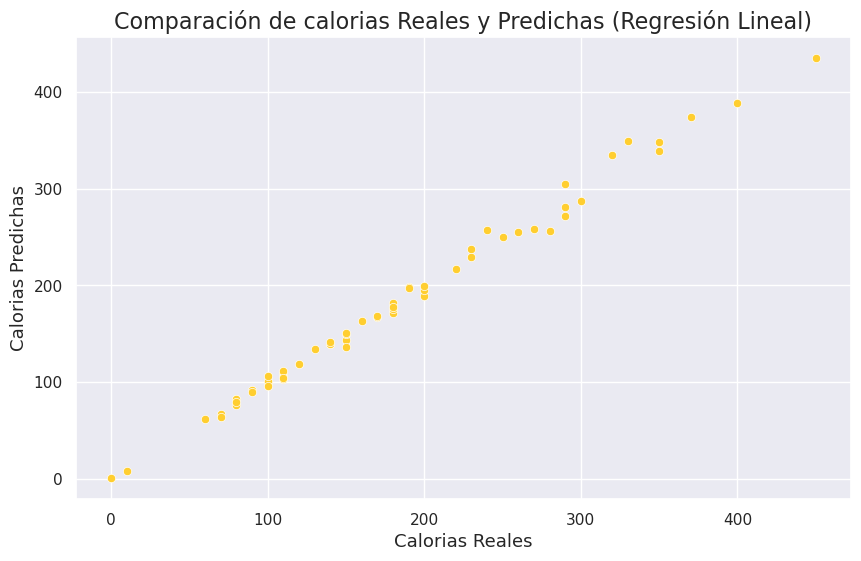

In [23]:
import seaborn as sns
import numpy as np

# Establecemos el estilo y el color del fondo
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

# Aplanamos y_predict_linear y y_test
y_predict_linear_flat = y_predict_linear.flatten()
y_test_flat = y_test.values.flatten()

# Creamos el gráfico de dispersión con Seaborn
sns.scatterplot(x=y_test_flat, y=y_predict_linear_flat, color="#FFCE30")

# Añadimos los títulos y etiquetas
plt.xlabel('Calorias Reales', fontsize=13)
plt.ylabel('Calorias Predichas', fontsize=13)
plt.title('Comparación de calorias Reales y Predichas (Regresión Lineal)', fontsize=16)

# Mostramos la gráfica
plt.show()

/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

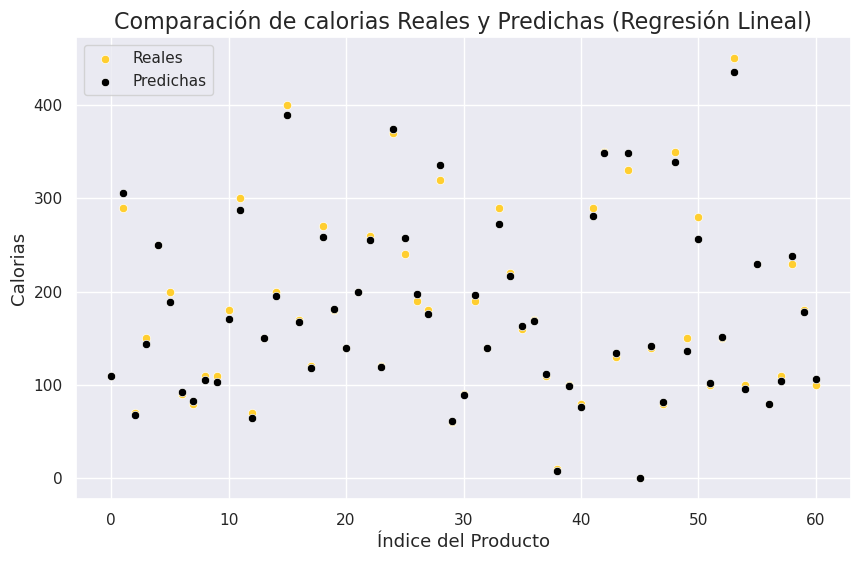

In [24]:
import seaborn as sns
import numpy as np

# Establecemos el estilo y el color del fondo
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

# Aplanamos y_predict_linear y y_test
y_predict_linear_flat = y_predict_linear.flatten()
y_test_flat = y_test.values.flatten()

# Creamos el gráfico de dispersión con Seaborn para los valores reales
sns.scatterplot(x=range(len(y_test_flat)), y=y_test_flat, color="#FFCE30", label='Reales')

# Creamos el gráfico de dispersión con Seaborn para los valores predichos
sns.scatterplot(x=range(len(y_predict_linear_flat)), y=y_predict_linear_flat, color="black", label='Predichas')

# Añadimos los títulos y etiquetas
plt.xlabel('Índice del Producto', fontsize=13)
plt.ylabel('Calorias', fontsize=13)
plt.title('Comparación de calorias Reales y Predichas (Regresión Lineal)', fontsize=16)

# Mostramos la gráfica
plt.show()

/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


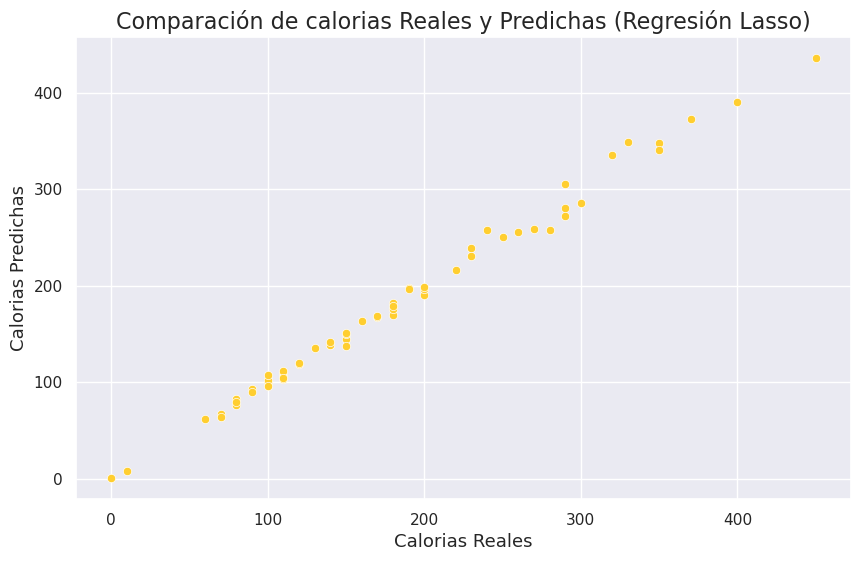

In [25]:
import seaborn as sns
import numpy as np

# Establecemos el estilo y el color del fondo
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

# Aplanamos y_predict_lasso y y_test
y_predict_lasso_flat = y_predict_lasso.flatten()
y_test_flat = y_test.values.flatten()

# Creamos el gráfico de dispersión con Seaborn
sns.scatterplot(x=y_test_flat, y=y_predict_lasso_flat, color="#FFCE30")

# Añadimos los títulos y etiquetas
plt.xlabel('Calorias Reales', fontsize=13)
plt.ylabel('Calorias Predichas', fontsize=13)
plt.title('Comparación de calorias Reales y Predichas (Regresión Lasso)', fontsize=16)

# Mostramos la gráfica
plt.show()

/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


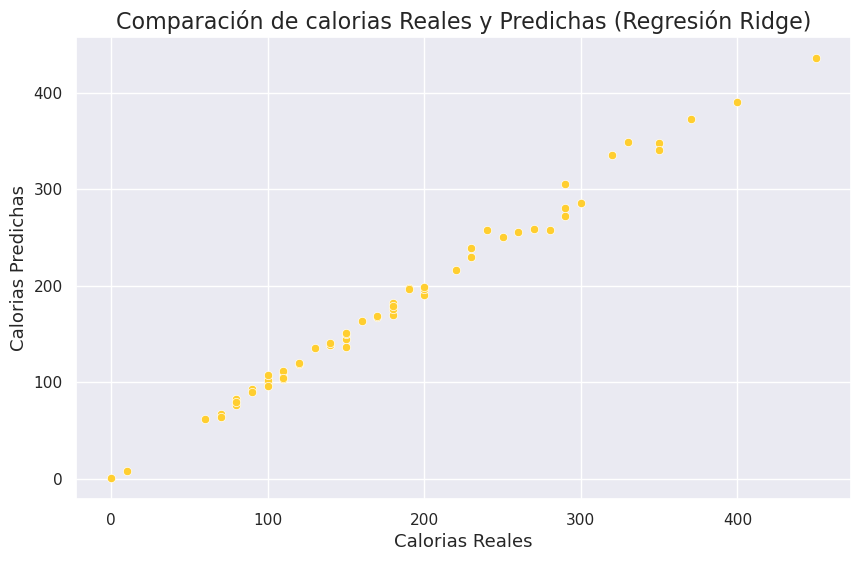

In [26]:
import seaborn as sns
import numpy as np

# Establecemos el estilo y el color del fondo
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

# Aplanamos y_predict_ridge y y_test
y_predict_ridge_flat = y_predict_ridge.flatten()
y_test_flat = y_test.values.flatten()

# Creamos el gráfico de dispersión con Seaborn
sns.scatterplot(x=y_test_flat, y=y_predict_ridge_flat, color="#FFCE30")

# Añadimos los títulos y etiquetas
plt.xlabel('Calorias Reales', fontsize=13)
plt.ylabel('Calorias Predichas', fontsize=13)
plt.title('Comparación de calorias Reales y Predichas (Regresión Ridge)', fontsize=16)

# Mostramos la gráfica
plt.show()

In [ ]:
# Agregamos la columna de predicciones al conjunto de datos original
dataset['Calorias predicción'] = modelLinear.predict(X)
dataset.head()

/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/martjaso/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg),Calorias predicción
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175,2.771290
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260,3.632681
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330,5.732293
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410,5.732293
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75,64.724207


In [ ]:
dataset = pd.read_csv('./Data/starbucks.csv')